<a href="https://colab.research.google.com/github/Duckkapon/deep-learning-project/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

## Vector - based

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
def perceptron(X, T, lr=0.1, w=None) :
    X = np.hstack((np.array(X), np.ones((len(X), 1)))) # เพิ่ม 1 มิติ เข้าไปเพื่อให้มี error, hyperplane สามารถขยับได้, มิติ translate -> Homogeneous coordinated
    if w is None :
        w = X[np.random.randint(0, len(X))].copy() # random มา 1 ตัว จาก X เพื่อใช้เป็น weight
    done = False
    while not done :
        done = True
        for i, x in enumerate(X) :
            if T[i] * np.dot(x, w) <= 0 : # เช็คว่าตัวไหนมีปัญหา ทำมุมป้าน
                w += lr * x * T[i]
                done = False
    return w

In [ ]:
def plot_hyperplane2d(X, T, w) :
    X = np.array(X)
    T = np.array(T)
    plt.plot(X[T==1, 0], X[T==1, 1], "go")
    plt.plot(X[T==-1, 0], X[T==-1, 1], "ro")
    xlim = plt.gca().get_xlim()
    slope = -w[0] / w[1]
    bias = -w[-1] / w[1]
    plt.plot(xlim, [xlim[0] * slope + bias, xlim[1] * slope + bias], "b")

[0.3 0.3 0.3]


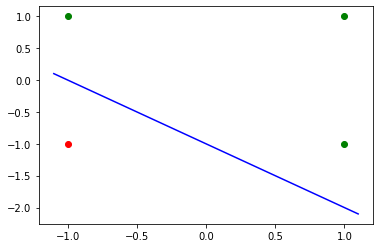

In [ ]:
# OR problem

X = [ [1,1], [1,-1], [-1,1], [-1,-1] ]
T = [1, 1, 1, -1] # เขียว 3 แดง 1

w = perceptron(X, T, lr=1e-1)
print(w)
plot_hyperplane2d(X, T, w)

[ 0.3  0.3 -0.3]


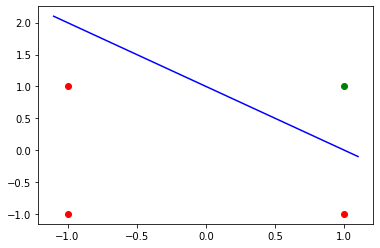

In [ ]:
# AND problem

X = [ [1,1], [1,-1], [-1,1], [-1,-1] ]
T = [1, -1, -1, -1] # เขียว 1 แดง 3

w = perceptron(X, T, lr=1e-1)
print(w)
plot_hyperplane2d(X, T, w)

In [ ]:
# XOR problem

X = [ [1,1], [1,-1], [-1,1], [-1,-1] ]
T = [-1, 1, 1, -1]

w = perceptron(X, T, lr=1e-1)
print(w)
plot_hyperplane2d(X, T, w)

# เกิด infinit loop เพราะไม่สามารถหาเส้นตรงซักเส้นเลยที่จะมาแบ่งเขียวกับแดงออกจากกันได้

## Gradient - based

Perceptron with TF

In [ ]:
import tensorflow as tf
import numpy as pd

d_in = (2,)

model = tf.keras.Sequential() # sequential เป็นการสร้าง list ของ layer ขึ้นมา
model.add(tf.keras.layers.Dense(1, input_shape=d_in)) # add layer เข้าไปใน sequential
model.add(tf.keras.layers.Activation("sigmoid"))

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.1))

Epoch 1/500
1/1 [==============================] - 0s 463ms/step - loss: 0.2087
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2056
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 0.2026
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1997
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1969
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1942
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1917
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 0.1893
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.1869
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 0.1847
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1825
Epoch 12/500
1/1 [==============================] - 0s 13ms/step - loss: 0.1805
Epoch 13/500
1/1 [==============================]

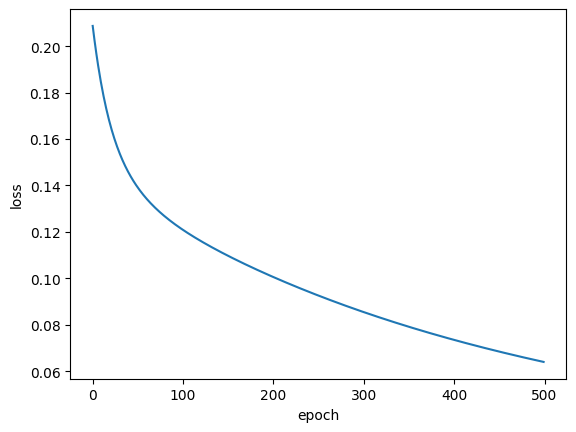

In [ ]:
# OR problem

X = [ [0,0], [0,1], [1,0], [1,1] ]
Y = [0, 1, 1, 1]

history = model.fit(X, Y, epochs = 500) # train model โดยแบ่ง data เป็น 500 ชุด แล้วเข้า SGD


import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

# plt.savefig("loss.png")
plt.show()


In [ ]:
Z = model.predict(X) # เอา model ที่ train ไปใช้งาน
print(tf.round(Z))

1/1 [==============================] - 0s 27ms/step
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)


# Non - linear Problem with Perceptron

Perceptron

Epoch 1/1000
1/1 [==============================] - 0s 486ms/step - loss: 0.2581
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2579
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2576
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2573
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2571
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2568
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2566
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2563
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2561
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2559
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2557
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2555
Epoch 13/1000
1/1 [===================

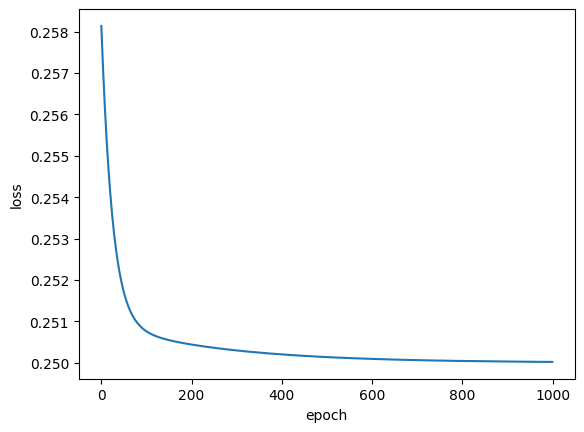

In [ ]:
# XOR problem

X = [ [0,0], [0,1], [1,0], [1,1] ]
Y = [0, 1, 1, 0]

history = model.fit(X, Y, epochs = 1000)

import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

# plt.savefig("loss.png")
plt.show()

In [ ]:
Z = model.predict(X) # เอา model ที่ train ไปใช้งาน
print(tf.round(Z), Y)

1/1 [==============================] - 0s 123ms/step
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32) [0, 1, 1, 0]


Multi-Layer Perceptron

In [ ]:
import tensorflow as tf

d_in = (2,)

model = tf.keras.Sequential() # sequential เป็นการสร้าง list ของ layer ขึ้นมา
model.add(tf.keras.layers.Dense(20, input_shape=d_in)) # add layer เข้าไปใน sequential -> Dense คือ fully connected
model.add(tf.keras.layers.Activation("sigmoid"))
model.add(tf.keras.layers.Dense(1)) # multi-layer
model.add(tf.keras.layers.Activation("sigmoid"))

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.SGD(learning_rate=1.5))

Epoch 1/1000
1/1 [==============================] - 0s 335ms/step - loss: 0.3195
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2570
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2502
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2502
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2502
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2502
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2502
Epoch 8/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2502
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2501
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2501
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2501
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2501
Epoch 13/1000
1/1 [===================

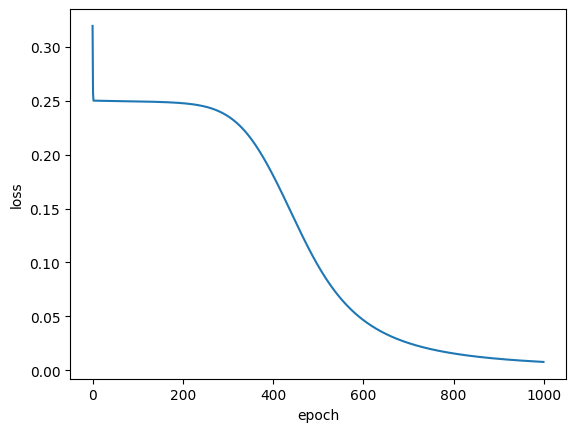

In [ ]:
# XOR problem

X = [ [0,0], [0,1], [1,0], [1,1] ]
Y = [0, 1, 1, 0]

history = model.fit(X, Y, epochs = 1000) # train model โดยแบ่ง data เป็น 1000 ชุด แล้วเข้า SGD


import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

# plt.savefig("loss.png")
plt.show()


In [ ]:
Z = model.predict(X) # เอา model ที่ train ไปใช้งาน
print(tf.round(Z), Y)

1/1 [==============================] - 0s 59ms/step
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32) [0, 1, 1, 0]


# Gradient Tape

เป็นการทำ auto differentiation ให้เลย

อะไรก็ตามที่อยู่ภายใต้ with จะถูกทำ differentiataion อัตโนมัติ

In [ ]:
# import tensorflow as tf

x = tf.Variable(3.0) # variable
with tf.GradientTape() as t:
    # y = x^2 + 2x + 1
    y = x**2 + 2*x + 1

# dy/dx = 2x + 2
dy_dx = t.gradient(y, x)
print(dy_dx)

tf.Tensor(8.0, shape=(), dtype=float32)


In [ ]:
x = tf.Variable(3.0) # constant
with tf.GradientTape() as t :
    t.watch(x)
    # y = x^2 + 2x + 1
    y = x**2 + 2*x + 1

# dy/dx = 2x + 2
dy_dx = t.gradient(y, x)
print(dy_dx)

เขียน function ขึ้นมาเองแล้วให้ diff ให้ก็ได้

In [ ]:
# piecewise function

def f(x):
    if x < -3:
        return 0.1 * x
    if -3 <= x <= 2:
        return 0.5 * x + 1.2
    if x > 2:
        return 0.1 * x + 2

In [ ]:
def df (x):
    with tf.GradientTape () as t:
        y = f(x)
    return t.gradient (y, x)
x1 = tf.Variable(-4.)
x2 = tf.Variable(1.)
x3 = tf.Variable(3.)
print(df(x1).numpy()) # 0.1
print(df(x2).numpy()) # 0.5
print(df(x3).numpy()) # 0.1

tf.Tensor(0.1, shape=(), dtype=float32)
tf.Tensor(0.1, shape=(), dtype=float32)


### Custom Gradien

- New operation
- Numerically unstable
- Manage cache from the forward pass
- Modify a value without modifying the gradient

In [ ]:
@tf.custom_gradient
def hardlim(x):
    if x >= 0:
        y = tf.clip_by_value(x, 1., 1.)
    else:
        y = tf.clip_by_value(x, 0., 0.)
    def grad(dy) :
        dy = tf.constant(0.)
        if x == 0. :
            dy = tf.constant(np.inf)
        return dy
    return y, grad

In [ ]:
x = tf.Variable(2.)
with tf.GradientTape() as t:
    y = hardlim(x)
print(y, t.gradient(y, x))

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Linear Regression

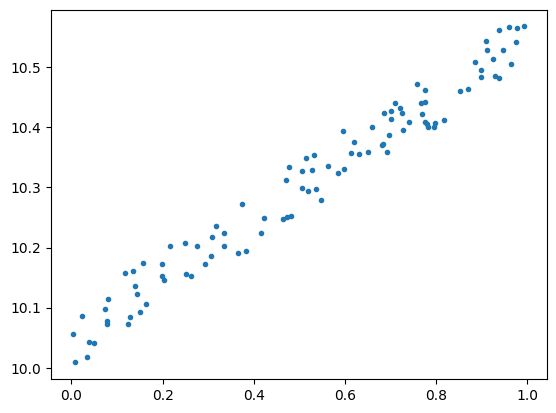

In [ ]:
# solution

import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100)
Y = 0.5 * X + 10 + 0.1*np.random.rand(100)

plt.plot(X, Y,  ".")
# plt.savefig("regress.png")
plt.show()

คำตอบคือ $y = 0.5x$ + 10

0 1.9491606 2.0790038 93.53609
50 2.7933698 8.7621975 0.47570595
100 1.6691 9.392692 0.12380676
150 1.0969043 9.713579 0.03265486
200 0.80568624 9.876895 0.009043906
250 0.65747106 9.960013 0.0029279992
300 0.5820372 10.002316 0.0013437949
350 0.5436457 10.023847 0.00093344384
400 0.5241063 10.034804 0.00082714955
450 0.5141609 10.040381 0.00079961435
500 0.50910044 10.04322 0.00079248287
550 0.5065244 10.044664 0.0007906338
600 0.5052139 10.045399 0.00079015404
650 0.50454783 10.0457735 0.00079003215
700 0.5042092 10.045962 0.00079000054
750 0.50403506 10.046061 0.0007899886
800 0.50394785 10.04611 0.00078998646
850 0.50390124 10.046135 0.0007899856
900 0.50388104 10.046145 0.00078998634
950 0.5038723 10.04615 0.00078998687
999 0.50386876 10.046152 0.0007899867


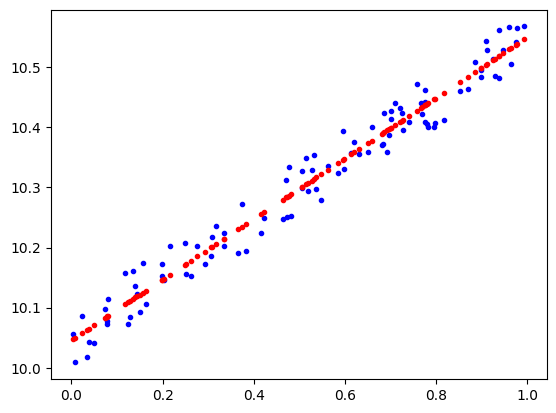

In [ ]:
# TF without Keras

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#####################################################
#################### Train model ####################
#####################################################

W = tf.Variable(np.random.rand()) # initial random weight
b = tf.Variable(np.random.rand()) # inittial random bias
lr = 0.1
epochs = 1000
for epoch in range(epochs) :
    with tf.GradientTape() as t :
        y = W * X + b # feedforward
        loss = tf.reduce_mean((Y-y)**2) # MSE -> function ใดก็ตามที่รวมค่าหลาย ๆ ค่าออกมาเป็ฯค่าเดียวจะชื่อ reduce ตาม map reduce

    dW, db = t.gradient(loss, [W, b]) # backpropagation -> diff loss เทียบกับ parameter ที่ต้องการ -> dE/dW, dE/db

    W.assign_sub(lr * dW) # optimizer -> gradient descent W = W - alpha*gradient , gradient = dE/dW
    b.assign_sub(lr * db) # optimizer -> gradient descent W = W - alpha*gradient , gradient = dE/db

    if (epoch % 50 == 0) | (epoch+1 == epochs):
        print(epoch, W.numpy(), b.numpy(), loss.numpy())

#####################################################
#################### Train model ####################
#####################################################

# ---------------------- plot --------------------------
Z = W * X + b

plt.plot(X, Y, ".b") # actual
plt.plot(X, Z, ".r")
plt.show()
# ---------------------- plot --------------------------


Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 72.9189
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 7.1424
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0136
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5220
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4624
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4207
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3780
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3413
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3092
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2792
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2239
Epoch 13/200
4/4 [==============================] - 0s 4ms/s

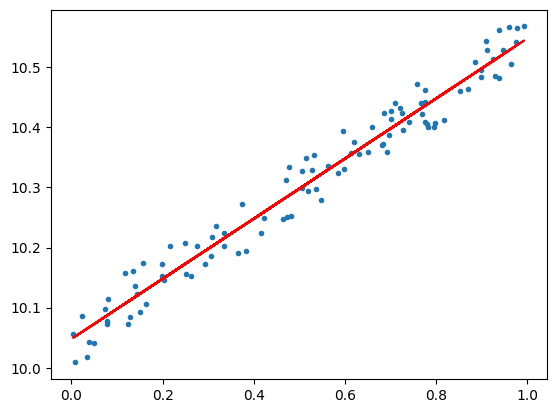

In [ ]:
# TF with Keras

import tensorflow as tf

d_in = (1, )
model = tf.keras.Sequential()

# Linear -> feedforward
model.add(tf.keras.layers.Dense(1,
                                input_shape = d_in))
model.compile(loss = tf.keras.losses.MeanSquaredError(), # loss function
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)) # optimizer -> ทำ differentiation ให้อัตโนมัต

model.fit(X, Y, epochs = 200, validation_freq = 50)

z = model.predict(X)
plt.plot(X, Y, ".")
plt.plot(X, z[:, 0], "r")
# plt.savefig(regr.png)
plt.show()

# Non-Linear Regression

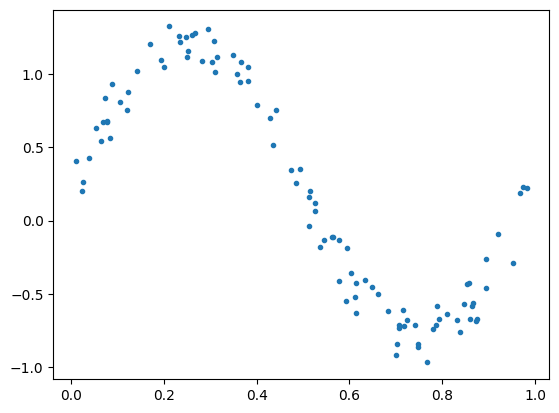

In [ ]:
# Solution
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)

plt.plot(X, Y,  ".")
# plt.savefig("regress.png")
plt.show()

with out Keras

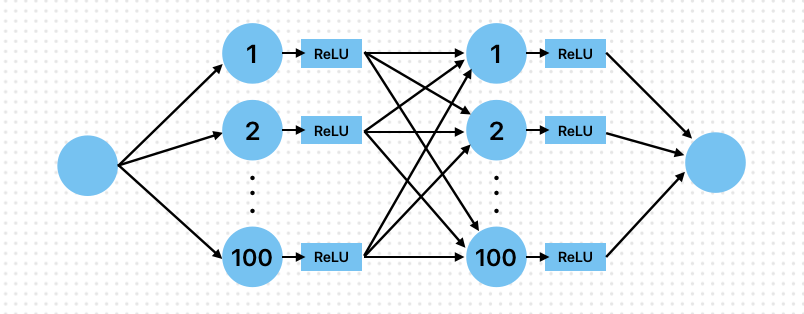

In [ ]:
W1 = tf.Variable(np.random.randn(1, 100))
b1 = tf.Variable(np.random.randn(100))
W2 = tf.Variable(np.random.randn(100, 100))
b2 = tf.Variable(np.random.randn(100))
W3 = tf.Variable(np.random.randn(100, 1))
b3 = tf.Variable(np.random.randn(1))

def relu(x) :
    return tf.where(x>=0, x, 0)

lr = 0.0001
epochs = 7000
for epoch in range(epochs) :
    with tf.GradientTape() as t:
        y = relu(X @ W1 + b1)
        y = relu (y @ W2 + b2)
        y = y @ W3 + b3
        loss = tf.reduce_mean((y - Y) **2)
    dW1, db1, dW2, db2, dW3, db3 = t.gradient(loss, [W1, b1, W2, b2, W3, b3])
    W1.assign_sub(lr * dW1)
    b1.assign_sub(lr * db1)
    W2.assign_sub(lr * dW2)
    b2.assign_sub(lr * db2)
    W3.assign_sub(lr * dW3)
    b3.assign_sub(lr * db3)
    if (epoch % 1000 == 0) | (epoch+1 == epochs) :
        print(f"epoch {epoch},\t loss = {loss.numpy()}")

epoch 0,	 loss = 686.3717126567483
epoch 1000,	 loss = 0.06834862442863159
epoch 2000,	 loss = 0.031028280406647325
epoch 3000,	 loss = 0.023940725913247852
epoch 4000,	 loss = 0.0209590571475711
epoch 5000,	 loss = 0.019453957699007037
epoch 6000,	 loss = 0.018601202628080658
epoch 6999,	 loss = 0.018049111794189894


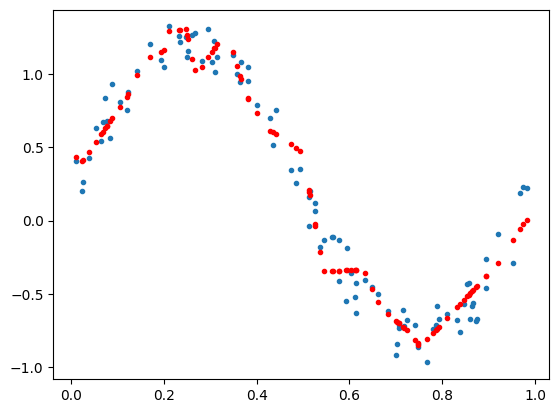

In [ ]:
Z = relu(X @ W1 + b1)
Z = relu (Z @ W2 + b2)
Z = Z @ W3 + b3

plt.plot(X, Y, ".")
plt.plot(X, Z, ".r")
plt.show()

with Keras

Streaming output truncated to the last 5000 lines.
Epoch 4502/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 4503/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 4504/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 4505/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 4506/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 4507/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 4508/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 4509/7000
4/4 [==============================] - 0s 4ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 4510/7000
4/4 [==============================] - 0s 5ms

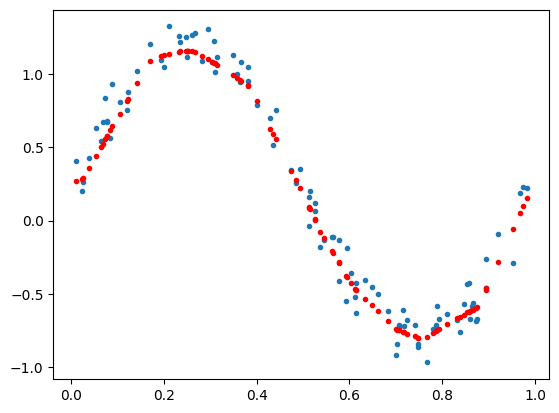

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape = (1,)))
model.add(tf.keras.layers.Activation("ReLU"))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Activation("ReLU"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1))

model.fit(X, Y, epochs = 7000)
z = model.predict(X)
plt.plot(X, Y, ".")
plt.plot(X, z[:, 0], ".r")
# plt.savefig(regr.png)
plt.show()

# MNIST

In [ ]:
! nvidia-smi

Tue May 16 07:13:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

(60000, 28, 28)
(60000, 28, 28, 1)


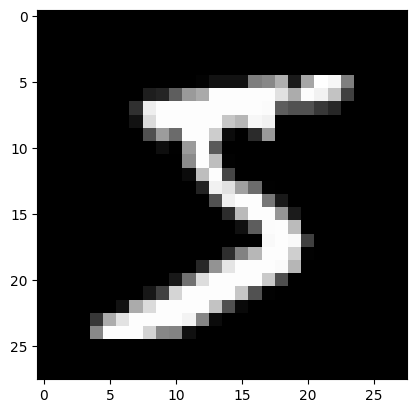

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
print(Xtrain.shape) # จะเห็นว่าเป็น 3 มิติ แต่ tf ต้องใช้ 4 มิติ
print(Xtrain[:,:,:, None].shape)

plt.imshow(Xtrain[0], cmap="gray") # Xtrain[0,:,:]


## Multi-layer Perceptron

In [ ]:
Xtrain.reshape(-1, 28*28).shape[1]

784

In [ ]:
# Perceptron

import tensorflow as tf
import numpy as np

(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

#------------------ Convert Matrix to Vector ------------------
Xtrain = Xtrain.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)
#------------------ Convert Matrix to Vector ------------------


#------------------ One-Hot Encoding ------------------
# manual
def onehot(Y, nclass=10) :
    Y_ = np.zeros((Y.shape[0], nclass))
    for i, y in enumerate(Y) :
        Y_[i, Y[i]] = 1
    return Y_
# Ytrain = onehot(Ytrain)
# Ytest = onehot(Ytest)

# with keras
Ytrain = tf.keras.utils.to_categorical(Ytrain, num_classes=10)
Ytest = tf.keras.utils.to_categorical(Ytest, num_classes=10)
#------------------ One-Hot Encoding ------------------


#------------------ Training model ------------------
d_in = (Xtrain.shape[1], )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,
                                input_shape = d_in,
                                activation = "relu"))
model.add(tf.keras.layers.Dense(200,
                                activation = "relu"))
model.add(tf.keras.layers.Dense(10,
                                activation = "softmax"))
model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001))

model.fit((Xtrain / 255.), Ytrain, epochs = 50, validation_data = (Xtest, Ytest))
#------------------ Training model ------------------


#------------------ Prediction ------------------
Z = model.predict(Xtest / 255.) # mapping ให้เป็น float [0.1]
print(np.sum(Z.argmax(axis = 1) == Ytest.argmax(axis = 1)) / len(Ytest))
#------------------ Prediction ------------------


Epoch 1/50
1875/1875 [==============================] - 10s 3ms/step - loss: 0.0915 - val_loss: 0.1799
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0911 - val_loss: 0.1791
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0907 - val_loss: 0.1777
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0903 - val_loss: 0.1753
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0899 - val_loss: 0.1719
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0895 - val_loss: 0.1674
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - val_loss: 0.1625
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - val_loss: 0.1576
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - val_loss: 0.1516
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.08

การใช้ perceptron (classical techniq) ในการแก้ปัญหา 2d นั้นไม่ค่อยมีประสิทธิภาพเท่าไหร่ เนื่องจากต้องแปลงรูปภาพ 2d ให้กลับมาเป็น vector

# 2D Discrete Cross-Correlation

- Correlation คือการวัดความคล้ายกับของ signal 2 อัน

ในการทำงานกับรูปภาพ Cross-Correlation จะเรียกว่าเป็น filtering

รูปภาพจะเป็น matrix -> การทำ 2D Discrete Cross-Correlation คือกาทำ sliding dot product
$$g_{i, j} = \sum_{u=-k}^k\sum_{v=-k}^kh_{u,v}f_{i+u, j+v}$$

In [ ]:
def sliding_dot_product(vec2d, filter) :
    i_idx = (vec2d.shape[0] - filter.shape[0]) + 1
    j_idx = (vec2d.shape[1] - filter.shape[1]) + 1
    i_fil = filter.shape[0]
    j_fil = filter.shape[1]
    lis = list()
    for i in range(i_idx) :
        for j in range(j_idx) :
            lis.append(np.sum(vec2d[i:i+i_fil,j:j+j_fil] * filter))
    return np.array(lis).reshape(i_idx,j_idx)

In [ ]:
vec2d = np.array([[0, 1, 2, 3],
                [4, 5, 6, 7],
                [8, 9, 10, 11],
                [12, 13, 14, 15]])
filter = np.array([[0, 1, 2],
                   [3, 4, 5],
                   [6, 7, 8]])

sliding_dot_product(vec2d, filter)

array([[258, 294],
       [402, 438]])

# Convolutional Nueral Network

เป็นการสร้าง layer ขึ้นมาจากการทำ 2D Discrete Cross-Correlation ใน neural network

**remark** : เรียกว่า convolutional แต่จริง ๆ แล้วเป็นการทำ 2D Discrete Cross-Correlation

## 2D Convolutional layer

ก่อนหน้านี้จะเห็น tf.keras.layers.Dense -> คือ fully connected สำหรับข้อมูลที่เป็น vector

ตอนนี้มาใช้ tf.keras.layers.Conv2D เพื่อสร้าง layer สำหรับทำงานกับข้อมูล 2D

In [ ]:
# tf.keras.layers.Conv2D(n_filter,
#                        filter_shape ,
#                        strides = จำนวนการเลื่อน filter default คือ 1,
#                        padding = output ที่ออกไป -> "valid" คือ filter ลดมิติลง -> "same" คือ เพิ่มขอบเข้าไปเพื่อให้ filter แล้วไม่หลุดขอบ จะได้มิติเท่าเดิม)

tf.keras.layers.Conv2D(3, (3, 3), strides= (5, 5), padding='valid') # Conv2D คือการทำ 2D Discrete Cross-Correlation

In [ ]:
# tf.keras.layers.MaxPoo12D(pool_size = filter_shape,
#                           strides = None เป็นการเลื่อน pool ตาม filter_shape แบบประกบกันพอดีไม่ overlab,
#                           padding='valid')
# เป็นการตั้งกรอบ pool_size เข้าไปเทียบแล้วเอาค่า max ที่อยู่ใน pool ออกมา

tf.keras.layers.MaxPoo12D(pool_size= (3, 3), strides=None, padding='valid')

## LeNet5 : The first CNNs

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, (5,5), input_shape = (32, 32, 1), activation = "relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(16, (5,5), activation = "relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation = "relu"))
model.add(tf.keras.layers.Dense(84, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

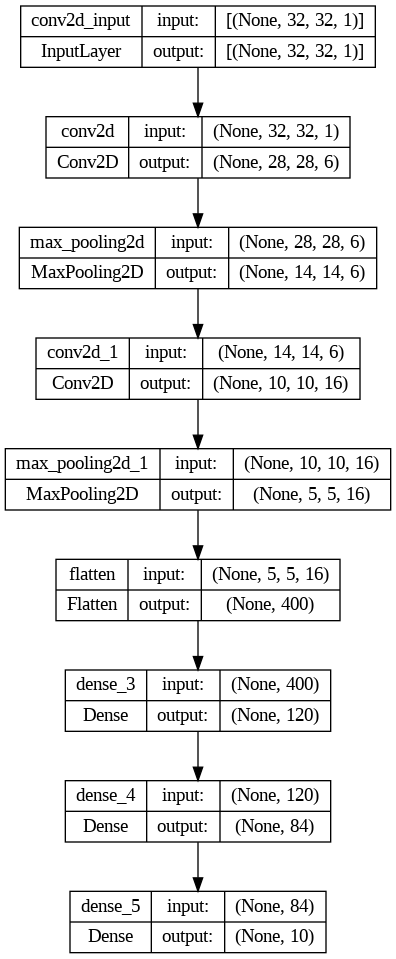

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# LeNet5 with TF

import tensorflow as tf
import numpy as np

(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain[:, :, :, None] / 255
Xtest = Xtest[:, :, :, None] / 255
Xtrain = tf.image.resize(Xtrain, (32, 32))
Xtest = tf.image.resize(Xtest, (32, 32))

#------------------ Training model ------------------
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, (5,5), input_shape = (32, 32, 1), activation = "relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(16, (5,5), activation = "relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation = "relu"))
model.add(tf.keras.layers.Dense(84, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd")
# display(model.summary())
# display(keras.utils.plot_model(model, show_shapes=True))
model.fit(Xtrain, Ytrain, epochs = 50)
#------------------ Training model ------------------

#------------------ Prediction ------------------
Z = model.predict(Xtest)
print(np.sum(Z.argmax(axis = 1) == Ytest) / len(Ytest))
#------------------ Prediction ------------------

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4878
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1229
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0688
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0450
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0408
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0372
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0335
Epoch 11/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0310
Epoch 12/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285
E

# Transfer Learning

Ex: Transfer Learning
• LeNet5 with MNIST - Thai Digits
• Dataset: https://github.com/kittinan/thai-handwriting-number/raw/master/src/thainumber_28.pkl

In [ ]:
! wget https://github.com/kittinan/thai-handwriting-number/raw/master/src/thainumber_28.pkl

--2023-05-16 10:39:47--  https://github.com/kittinan/thai-handwriting-number/raw/master/src/thainumber_28.pkl
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kittinan/thai-handwriting-number/master/src/thainumber_28.pkl [following]
--2023-05-16 10:39:47--  https://raw.githubusercontent.com/kittinan/thai-handwriting-number/master/src/thainumber_28.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5232271 (5.0M) [application/octet-stream]
Saving to: ‘thainumber_28.pkl’

thainumber_28.pkl   100%[===================>]   4.99M  --.-KB/s    in 0.08s   

2023-05-16 10:39:47 (64.2 MB/s) - ‘thainumber_

In [ ]:
import pickle
pkl = open("/content/thainumber_28.pkl", "rb")
data = pickle.load(pkl)

X = data["X"]
Y = data["Y"]

print(X.shape)
print(len(np.unique(Y)))

(1665, 28, 28, 1)
10


1


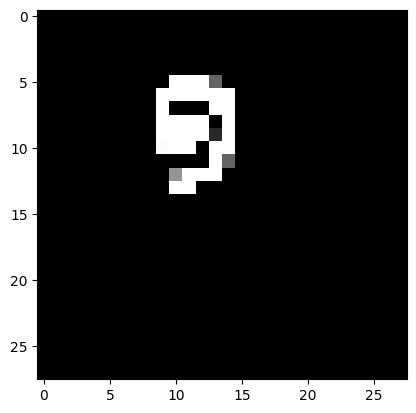

In [ ]:
print(Y[0])
plt.imshow(X[0], cmap = "gray")
plt.show()

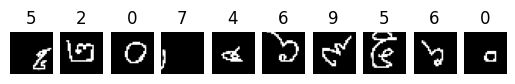

In [ ]:
n = 10

for j, i in enumerate(np.random.choice(len(X), n)) :
    plt.subplot(2, n, j+1)
    plt.imshow(X[i], cmap = "gray")
    plt.axis('off')
    plt.title(Y[i])
# plt.savefig('thai.png')
plt.show ()

Preparing data

In [ ]:
# resize จาก (28,28) เป็น (32, 32) -> หรือจะไปใช้ tf เดิมก็ได้ อันนี้ลองใช้อันอื่นๆดู
from skimage.transform import resize

_X = []
for x in X:
    _X.append(resize(x, (32, 32)))
X = np.array(_X)
del _X

In [ ]:
# train-test
idx = np.random.permutation(np.arange(len (X)))

split = 1665 * 8 // 10
train_idx = idx[:split]
test_idx = idx[split:]
Xtrain, Ytrain = X[train_idx] / 255., Y[train_idx].astype(np.int)
Xtest, Ytest = X[test_idx] /255., Y[test_idx].astype(np.int)

<ipython-input-90-96846aabb327>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Xtrain, Ytrain = X[train_idx] / 255., Y[train_idx].astype(np.int)
<ipython-input-90-96846aabb327>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.


In [ ]:
Z = model.predict(Xtest) # from LaNet-5 -> แต่ Xtest นี้เป็นเลขไทย
np.sum(Z.argmax(axis=1) == Ytest)/len(Ytest)

11/11 [==============================] - 0s 6ms/step


0.12012012012012012

Transfer Learning

In [ ]:
model.fit(Xtrain, Ytrain, epochs = 50)

Epoch 1/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0587
Epoch 2/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 3/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 4/25
42/42 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 5/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 6/25
42/42 [==============================] - 0s 4ms/step - loss: 0.0423
Epoch 7/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0393
Epoch 8/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 9/25
42/42 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 10/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 11/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 12/25
42/42 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 13/25
42/42 [==============================

In [ ]:
Z = model.predict(Xtest) # model หลังจาก transfer learning
np.sum(Z.argmax(axis=1) == Ytest)/len(Ytest)

11/11 [==============================] - 0s 2ms/step


0.7597597597597597

ได้ accuracy เพิ่มขึ้นมาจาก 10% -> 76% หลังจาก transferlearning

# VGG16

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape = (224, 224, 3) ))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
              loss = keras.losses.sparse_categorical_crossentropy)



Preparing data

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.mnist.load_data ()
Xtrain = Xtrain[:,:,:, None] / 255.
Xtest = Xtest [:,:,:, None] / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# out of memory -> กิน memory เกินไป จาก 28*28 เป็น 224*224*3 -< memory ไม่พอ

# Xtrain = tf.image.resize(Xtrain, (224,224))
# Xtrain = tf.image.grayscale_to_rgb(Xtrain)
# Xtest = tf.image.resize(Xtest, (224, 224))
# Xtest = tf.image.grayscale_to_rgb(Xtest)

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator() # ทำ batch สำหรับ resize รูปภาพ -> เพราะถ้าไม่ batch จะกิน memory เกินไป จาก 28*28 เป็น 224*224*3
batch = 64 # ทำรอบละ 64 รูป
datagen.fit(Xtrain)
num_batch = len(Xtrain) / batch
Progbar = keras.utils.Progbar(num_batch)
for epoch in range (50) :
    batches = 0
    for x, y in datagen.flow(Xtrain, Ytrain, batch_size = batch) : # เริ่มทำ batch แล้ว
        x = tf.image.resize(x, (224, 224)) # resize 28*28 -> 224*224
        x = tf.image.grayscale_to_rgb(x) # เพิ่ม rgb
        history = model.fit(x, y, verbose = 0)
        batches += 1
        Progbar.update(batches, values = [('loss', history.history["loss"][0])])
        if batches >= num_batch:
            print (epoch)
            break

  7/937 [..............................] - ETA: 24:48:03 - loss: 1.8429

KeyboardInterrupt: ignored

In [ ]:
Z = model.predict(Xtest)
np.sum(Z.argmax(axis=1) == Ytest)/len(Ytest)

ValueError: ignored

# Transfer Learning with VGG

MNist Dataset transfer learning by
vgg

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16 # pre-training แทนการโค้ดด้านบนที่รันไม่ได้
from tensorflow.keras import layers, Model
import numpy as np

config model : Option 1

In [ ]:
# ถ้าเอา full layer มาจะมี flaten มาด้วยซึ่งจะ fix ขนาดของ layer ไว้
# ดังนั้น input รูปภาพก็จะ fix ไว้ด้วย (224*224*3)
# vgg = VGG16(include_top = True, weights = "imagenet")
# vgg.summary()

# include_top = False คือไม่เอา layer ท้ายสุด
# พอเราไม่เอา flaten มาด้วยเนี่ย ก็ไม่มี layer ไหนที่ต้อง fix ขนาดไว้
# ดังนั้น input จะมีขนาดเท่าไหร่ก็ได้
vgg = VGG16(include_top = False, weights = "imagenet") # imagenet รูปภาพธรรมชาติ สัตว์
# vgg.summary()

# fit input
x_in = layers.Input(shape = (32, 32, 1)) # เนื่องจากตัว pre-train ไม่ได้ fix ไว้ก็ต้องสร้างเอง
# เนื่องจากไม่ได้ใช้ sequential() ดังนั้นจึงต้องต่อ layer เอง
x = layers.Conv2D(3, 1)(x_in) # ตัว mnist shape คือ (32, 32, 1) -> แต่ vgg ต้องการ 3 chanel เป็น rgb จึงเอาไปผ่าน cnn ให้ได้ 3 chanel
x = vgg(x)
# fit output
x = layers.Flatten()(x)
x = layers.Dense(10, activation = "softmax")(x)
model = Model(x_in, x) # Model(input, model_output)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 3)         6         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,824
Trainable params: 14,719,824
Non-trainable params: 0
_________________________________________________________________


Preprocessing

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.mnist.load_data()
Xtrain = Xtrain[:,:,:, None] / 255.
Xtest = Xtest [:,:,:, None] / 255.

Xtrain = tf.image.resize(Xtrain, (32, 32))
Xtest = tf.image.resize(Xtest, (32, 32))

Transfer learning - training

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd")
model.fit(Xtrain, Ytrain, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 62s 27ms/step - loss: 0.1070
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0270
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0177
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0144
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0107
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0086
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0071
Epoch 8/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0054
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0043
Epoch 10/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0033


In [ ]:
Z = model.predict(Xtest)
np.sum(Z.argmax(axis=1) == Ytest)/len(Z)

313/313 [==============================] - 2s 6ms/step


0.1573

Config model : Option 2

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(include_top = False, weights = "imagenet", input_shape = (32, 32, 3))

# fit output
x = layers.Flatten()(vgg.output)
x = layers.Dense(10, activation = "softmax")(x)
model = Model(vgg.input, x) # Model(input, model_output)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

Preprocessing

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.mnist.load_data()
Xtrain = Xtrain[:,:,:, None] / 255.
Xtest = Xtest [:,:,:, None] / 255.

Xtrain = tf.image.resize(Xtrain, (32, 32))
Xtrain = tf.image.grayscale_to_rgb(Xtrain)
Xtest = tf.image.resize(Xtest, (32, 32))
Xtest = tf.image.grayscale_to_rgb(Xtest)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd")
model.fit(Xtrain, Ytrain, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 51s 26ms/step - loss: 0.1064
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0255
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0174
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0134
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0107
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0085
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0063
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0051
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0046
Epoch 10/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0031


In [ ]:
Z = model.predict(Xtest)
np.sum(Z.argmax(axis=1) == Ytest)/len(Z)

313/313 [==============================] - 2s 7ms/step


0.9956

# Autoencoder with Dense

สามารถใช้ประโยชน์ของ layer แต่ละชึ้นมาทำ encoder ก็ได้

In [ ]:
import numpy as np

X = np.eye(8).astype(np.float32)
X

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# autoencoder
from tensorflow import keras

input = keras.Input(shape=X.shape[1])
encoder = keras.layers.Dense(3, activation="sigmoid")
decoder = keras.layers.Dense(X.shape[1], activation="sigmoid")
outputs = decoder(encoder(input))

model = keras.Model(input, outputs)
model.summary()
model.compile(loss = "mse",
              optimizer = keras.optimizers.SGD(learning_rate = 3.5))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 3)                 27        
                                                                 
 dense_1 (Dense)             (None, 8)                 32        
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, X, epochs = 2000, verbose = 0)

In [ ]:
Z = model.predict(X)
np.round(Z)

1/1 [==============================] - 0s 18ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
E = encoder(X) # เรียก layer มาทำ encoder
np.round(E)
# เนื่องจาก X เป็น indentity metrix ดังนั้นแถวแต่ละแถวไม่ควรจะซ้ำกัน
# encoder ที่ดีก็ไม่ควรจะซ้ำกัน -> ถ้าซ้ำกัรแสดงว่า train ไม่ดีพอ

array([[0., 1., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 1., 1.],
       [0., 0., 0.]], dtype=float32)

## Feature Extraction

layer ยังเอามาทำ feature extraction ได้อีกด้วยโดย

- ใช้ autoencoder มาเป็นตัวทำ feature extraction
- **ใช้แค่ layer encoder เท่านั้น โดยไม่สนใจ decoder**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

In [ ]:
(X, Y), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0
X = X.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)

11490434/11490434 [==============================] - 2s 0us/step


### SVM : classification (no autoencoder as Feature exrtractor)

In [ ]:
clf = SVC()
clf.fit(X, Y)
Z = clf.predict(Xtest)
print(f"accuracy rate = {accuracy_score(Ytest, Z)}")
print("confusion matrix :")
print(confusion_matrix(Ytest, Z))

accuracy rate = 0.9792
confusion matrix :
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


### Autoencoder

In [ ]:
# autoencoder => 784-392-196-98-196-392-784
inputs = tf.keras.layers.Input(shape = X.shape[1])
en1 = tf.keras.layers.Dense(X.shape[1] // 2, activation = "relu")
en2 = tf.keras.layers.Dense(X.shape[1] // 4, activation = "relu")
en3 = tf.keras.layers.Dense(X.shape[1] // 8, activation = "relu")

de1 = tf.keras.layers.Dense(X.shape[1] // 4, activation = "relu")
de2 = tf.keras.layers.Dense(X.shape[1] // 2, activation = "relu")
de3 = tf.keras.layers.Dense(X.shape[1], activation = "relu")

outputs = de3(de2(de1(en3(en2(en1(inputs))))))

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss = "mse",
              optimizer = "sgd")

In [ ]:
model.fit(X, X, epochs = 200, verbose=0)

### Feature extraction (784 -> 98)

In [ ]:
Xencoded = en3(en2(en1(X))).numpy()
print(Xencoded.shape)

Xtestencoded = en3(en2(en1(Xtest))).numpy()
print(Xtestencoded.shape)


(60000, 98)
(10000, 98)


### SVM : classification (with autoencoder as Feature exrtractor)

In [ ]:
clf = SVC()
clf.fit(Xencoded, Y)

Z = clf.predict(Xtestencoded)
print(f"accuracy rate = {accuracy_score(Ytest, Z)}")
print("confusion matrix :")
print(confusion_matrix(Ytest, Z))

accuracy rate = 0.9448
confusion matrix :
[[ 966    0    1    1    1    4    4    1    2    0]
 [   0 1122    3    2    0    4    2    0    2    0]
 [  11    0  956    9    8    5   14   11   16    2]
 [   4    2   11  951    3   11    2    9   14    3]
 [   1    0    8    0  940    1    8    3    2   19]
 [   6    2    9   29    5  819    9    3    9    1]
 [  11    4    4    2    6    7  922    0    2    0]
 [   2   11   21    1    9    2    0  952    5   25]
 [   6    2    6   15    7   19    8    6  900    5]
 [   9    7    5   10   36    5    1   12    4  920]]


หลังจากทำ autoencode as feature extraction แล้ว SVM มีความเร็วมากขึ้นหลายเท่า เพราะมิติของข้อมูลลดลงเยอะ จาก 784 เหลือ 98 (ลดลง 8 เท่า)

|model|shape|time|accuracy|
|---|---|---|---|
|no encoder|784|5 mins|0.9792|
|with encoder|98|1 min|0.9448|


## Reconstructor

layer ยังเอามาทำ Reconstructor ได้อีกด้วยโดย

- ใช้ autoencoder มาเป็นตัวทำ Reconstructor
- **ใช้แค่ layer decoder เท่านั้น โดยไม่สนใจ encoder**

ใช้ทำอะไรได้บ้าง
1. Data Compression
2. Denoising
3. Generate new data!!!
> - By generating feature vector with small dimension

### Autoencoder

In [ ]:
# autoencoder => 784-392-196-98-196-392-784
inputs = tf.keras.layers.Input(shape = X.shape[1])
en1 = tf.keras.layers.Dense(X.shape[1] // 2, activation = "relu")
en2 = tf.keras.layers.Dense(X.shape[1] // 4, activation = "relu")
en3 = tf.keras.layers.Dense(X.shape[1] // 8, activation = "relu")

de1 = tf.keras.layers.Dense(X.shape[1] // 4, activation = "relu")
de2 = tf.keras.layers.Dense(X.shape[1] // 2, activation = "relu")
de3 = tf.keras.layers.Dense(X.shape[1], activation = "relu")

outputs = de3(de2(de1(en3(en2(en1(inputs))))))

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss = "mse",
              optimizer = "sgd")

In [ ]:
model.fit(X, X, epochs = 200, verbose=0)

### Decoder

In [ ]:
Xtestencoded = en3(en2(en1(Xtest))).numpy()
print(Xencoded.shape)

Recon = de3(de2(de1(Xtestencoded))).numpy()
print(Recon.shape)

(60000, 98)
(10000, 784)


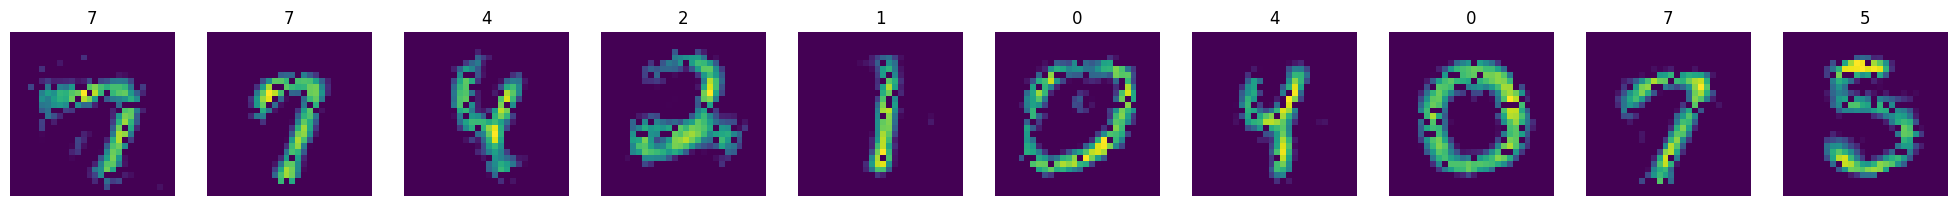

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize = (25, 25))
for j, i in enumerate(np.random.randint(0, len(Recon), n)) :
    plt.subplot(1, n, j+1)
    plt.imshow(Recon[i].reshape(28, 28))
    plt.title(Ytest[i])
    plt.axis('off')
plt.show()

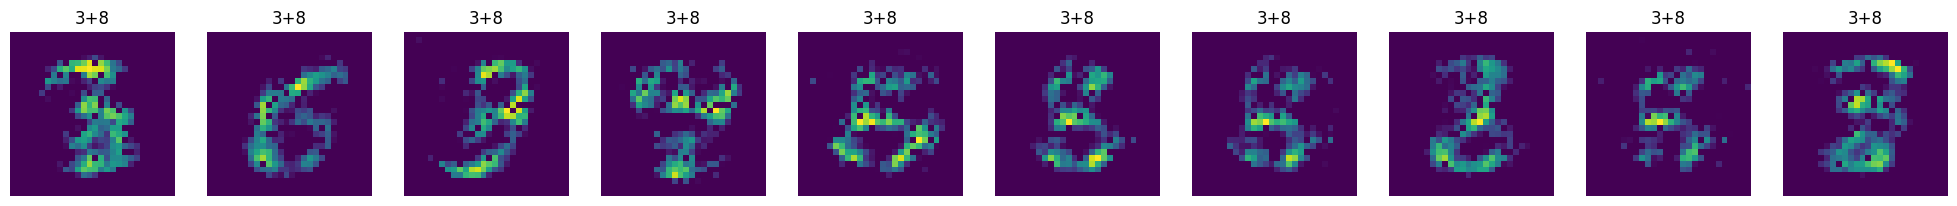

In [ ]:
# cross over - genetics algorithm
p = [3,8] # เอาเลข 3 มาครึ่งหนึ่ง เลข 8 มาครึ่งหนึ่ง
p1 = np.where(Ytest==p[0])[0]
p2 = np.where(Ytest==p[1])[0]
n=10
plt.figure(figsize=(25, 25))
for i in range(n):
    temp = Xtestencoded[[np.random.choice(p1), np.random.choice(p2)]]
    x = np.hstack((temp[0, :temp.shape[1]//2],
    temp[1, temp.shape[1]//2:])).reshape(1, temp.shape[1])
    Recon = de3(de2(de1(x))).numpy()
    Recon = Recon.reshape((len(Recon), 28, 28))[0]
    plt.subplot (1, n,i+1)
    plt.imshow(Recon)
    plt.title(str(p[0])+'+'+str(p[1]))
    plt.axis('off')
plt.show()

In [ ]:
p = [4,8]
p1 = np.where(Ytest==p[0])[0]
p2 = np.where(Ytest==p[1])[0]

In [ ]:
Ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Autoencoder with CNN

In [ ]:
(*X.shape[1:],1)

(28, 28, 1)

In [ ]:
(X, Y), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0

In [ ]:
# encoder
inputs = tf.keras.layers.Input(shape = (*X.shape[1:], 1))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
x = tf.keras.layers. MaxPooling2D( (2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding= "same")(x)
x = tf.keras.layers.MaxPooling2D( (2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoder = tf.keras.Model(inputs, encoded, name='encoder')

# decoder
encoded_inputs = tf.keras.layers.Input(shape=encoded.shape[1:])
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_inputs)
x = tf.keras.layers.UpSampling2D((2, 2))(x) # UpSampling2D ให้ dimension กลับมาเหมือนก่อน MaxPooling2D
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D( (2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D( (2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same') (x)
decoder = tf.keras.Model(encoded_inputs, decoded, name='decoder')

model = tf.keras.Model(inputs, decoder(encoder(inputs)), name='autoencoder')
model.summary()
model.compile(optimizer='sgd', loss='mse')

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 4, 4, 8)           1904      
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         2481      
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X[:,:,:,None], X[:,:,:,None], epochs=50)

Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1055
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0731
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0560
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0513
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0484
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0440
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0423
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0410
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0399
Epoch 11/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0389
Epoch 12/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0379


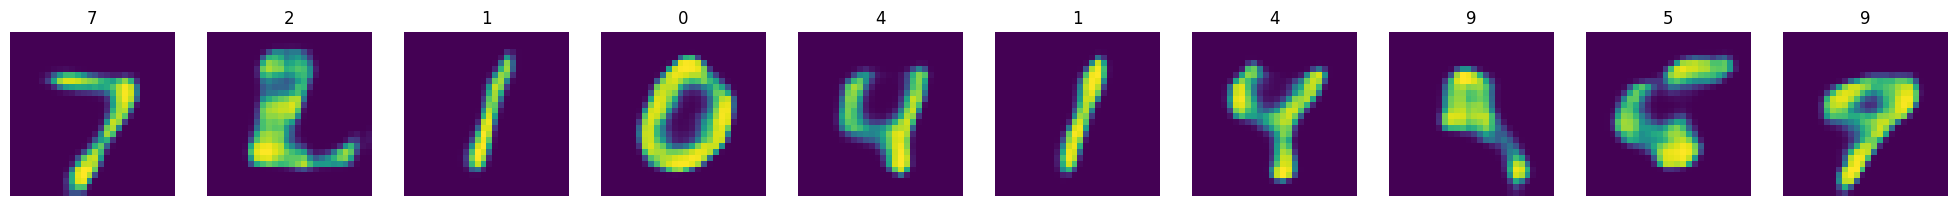

In [ ]:
Z = model(Xtest)
n = 10
plt.figure(figsize = (25, 25))
for i in range(n) :
    plt.subplot(1, n, i+1)
    plt.imshow(Z[i][:, :,0])
    plt.axis('off')
    plt.title(Ytest[i])
plt.show()

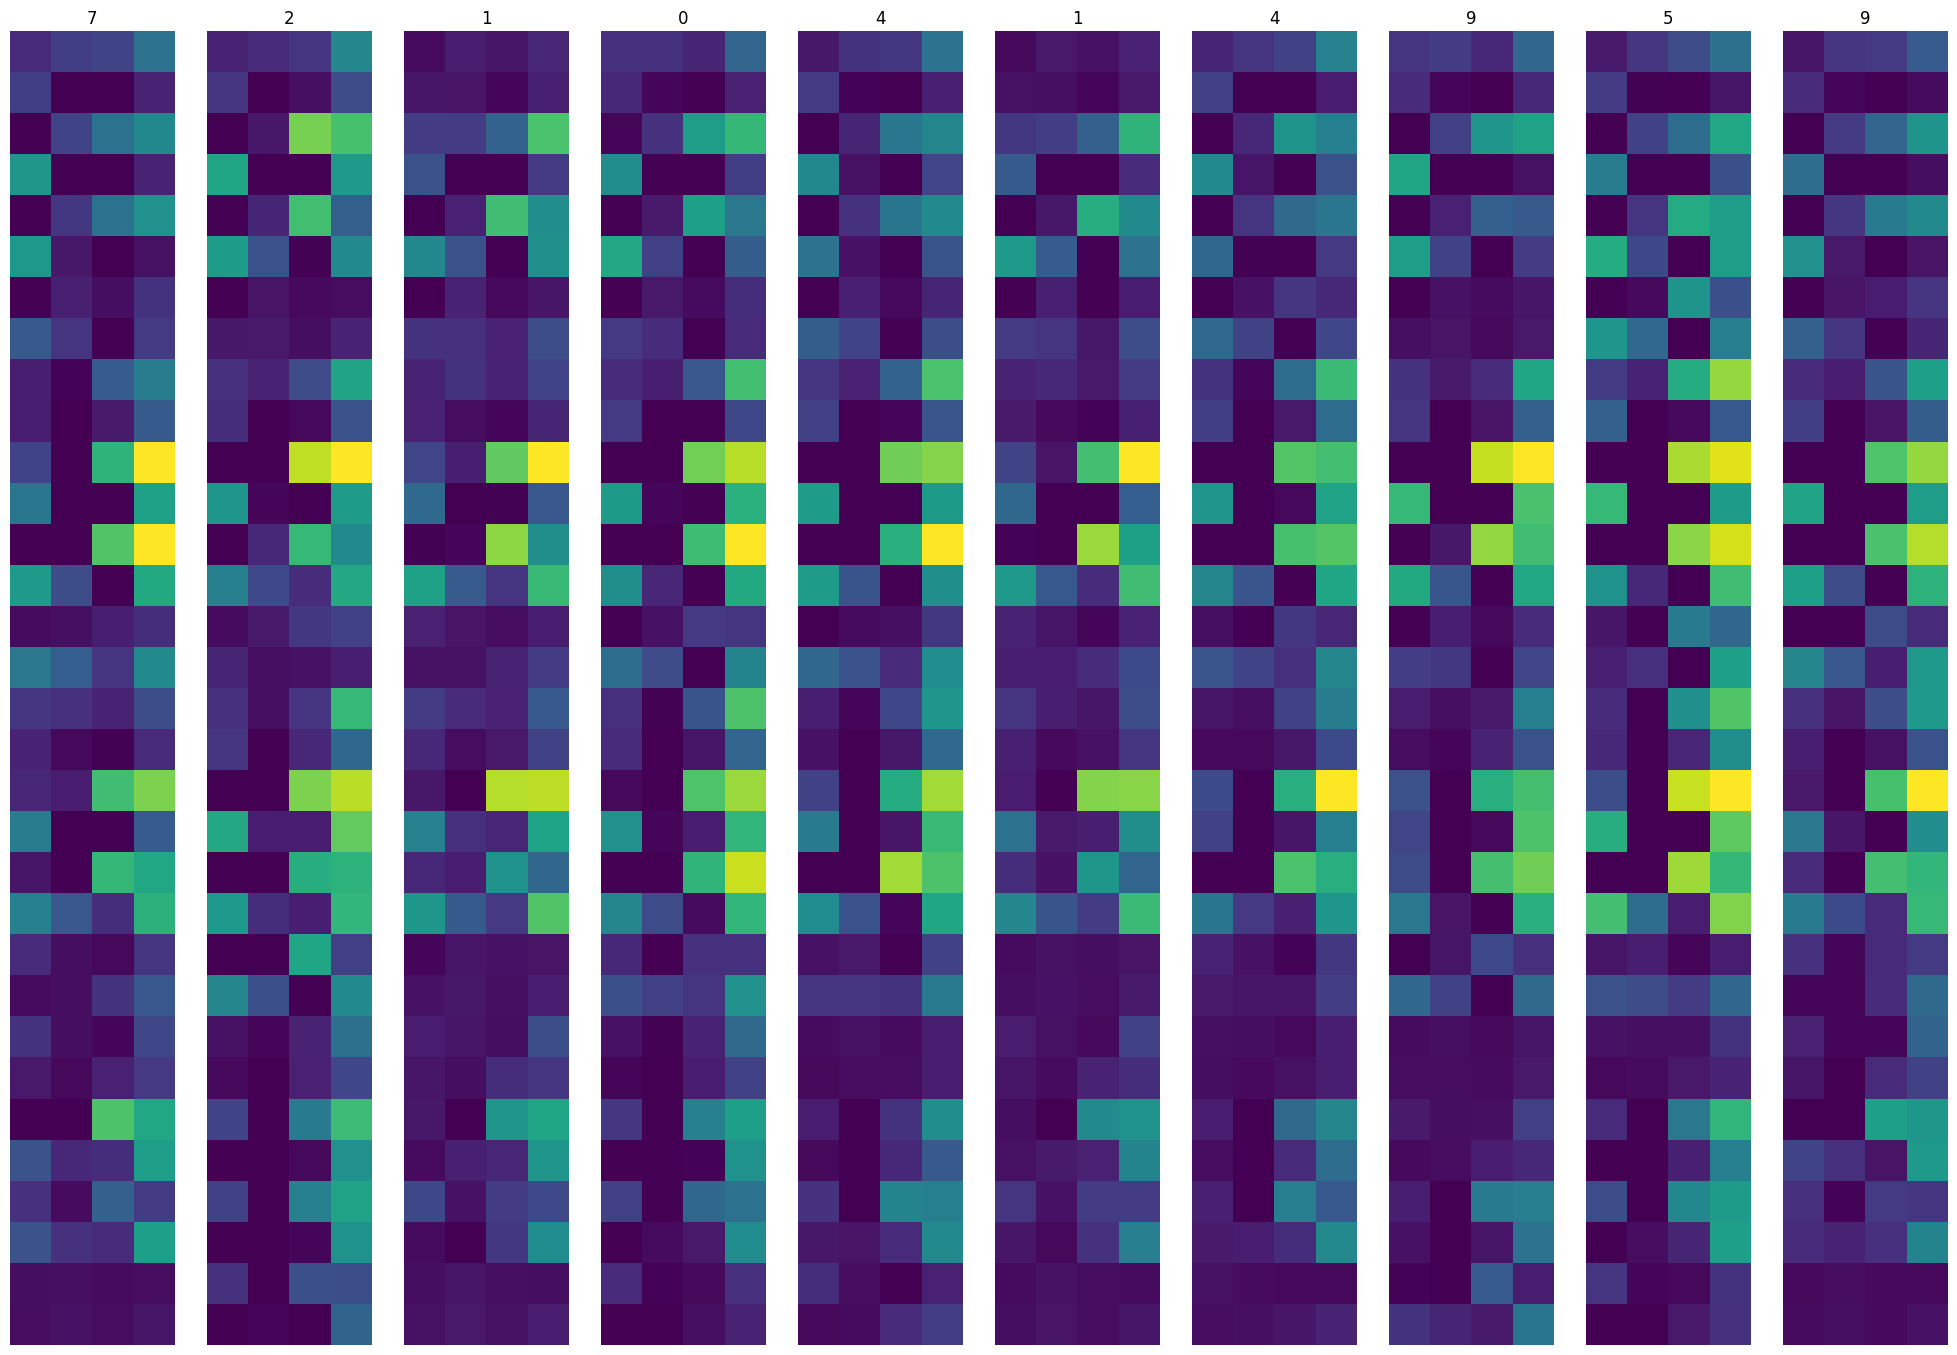

In [ ]:
Z = encoder(Xtest)
n = 10
plt.figure(figsize = (25, 25))
for i in range(n) :
    plt.subplot(1, n, i+1)
    plt.imshow(Z[i].numpy().reshape(32, -1))
    plt.axis('off')
    plt.title(Ytest[i])
plt.show()

## Denoising

In [ ]:
Xnoise = Xtest + 0.5 * np.random.rand(*Xtest.shape) # เพื่ม noise
Xnoise /= Xnoise.max()
Z = model(Xnoise)
n = 10
plt.figure(figsize=(25, 25))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(Xnoise[i])
    plt.axis('off')
    plt.title(Ytest[i])
plt.show ()

plt.figure(figsize=(25, 25))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(Z[i][:,:,0])
    plt.axis('off')
plt.show()

# Semantic Segmentation

เป็นการทำ autoencoder แบบ supervised learning

เป็นการ segmentation ข้อมูลต่าง ๆ ที่อยู่ในรูปภาพ (SegNet)

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
kernel = 3
autoencoder = [
    # Encoder
    layers.Conv2D(64, kernel, padding = "same", input_shape = (256, 256, 1)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, kernel, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(256, kernel, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(512, kernel, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),

    # Decoder
    layers.UpSampling2D(),
    layers.Conv2D(512, kernel, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.UpSampling2D(),
    layers.Conv2D(256, kernel, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.UpSampling2D(),
    layers.Conv2D(128, kernel, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.UpSampling2D(),
    layers.Conv2D(64, kernel, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(1, 1, 1, padding = "same"),
    layers.BatchNormalization(),
    layers.Activation("relu")
]
segnet = models.Sequential(autoencoder)
segnet.compile(loss = "mse", optimizer = "sgd")

In [ ]:
segnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 batch_normalization_27 (Bat  (None, 256, 256, 64)     256       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 batch_normalization_28 (Bat  (None, 128, 128, 128)   

## SegNet for Lung Segmentation



In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

path_train = "/content/drive/MyDrive/AIAT/Lung Segmentation Dataset/train"
Xtrain = []
Ytrain = []
for fn in os.listdir(path_train):
    if fn.endswith('jpg'):
        Xtrain.append(plt.imread(os.path.join(path_train, fn)))
        Ytrain.append(plt.imread(os.path.join(path_train, fn + '-msk.png')))

Xtrain = np.array(Xtrain)[:,:,:,None]
Ytrain = np.array(Ytrain)[:,:,:,None]

In [ ]:
segnet.fit(Xtrain, Ytrain, epochs = 5) # epochs = 200

Epoch 1/5
1/1 [==============================] - 28s 28s/step - loss: 0.0735
Epoch 2/5
1/1 [==============================] - 36s 36s/step - loss: 0.0701
Epoch 3/5
1/1 [==============================] - 32s 32s/step - loss: 0.0674
Epoch 4/5
1/1 [==============================] - 30s 30s/step - loss: 0.0651
Epoch 5/5
1/1 [==============================] - 25s 25s/step - loss: 0.0630


Test

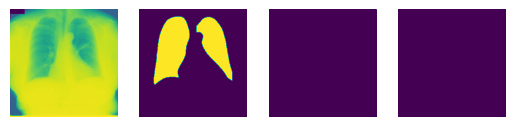

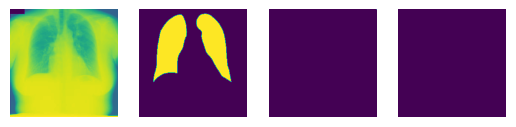

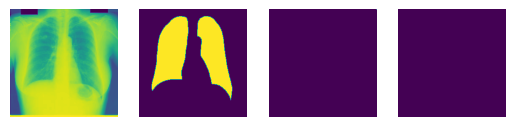

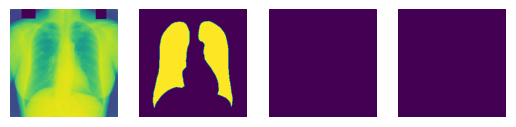

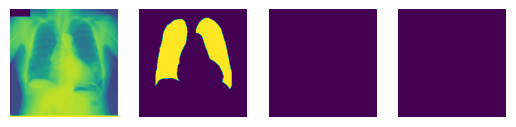

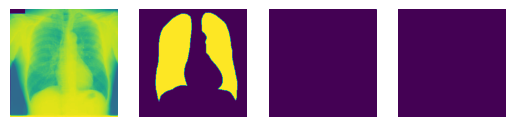

In [ ]:
# Ztrain = segnet(Xtrain)
for i in range(len(Ztrain)):
    plt.subplot (1, 4, 1)
    plt.imshow(Xtrain[i][:,:,0])
    plt.axis("off")
    plt.subplot (1, 4, 2)
    plt.imshow(Ytrain[i][:,:,0])
    plt.axis("off")
    plt. subplot (1, 4, 3)
    plt.imshow(Ztrain[i][:,:,0])
    plt.axis("off")
    plt. subplot (1, 4, 4)
    plt.imshow(Ztrain[i][:,:,0] > 0.5)
    plt.axis("off")
    # plt.imshow(Ztrain[i].numpy().argmax(axis=2))
    plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

path_test = "/content/drive/MyDrive/AIAT/Lung Segmentation Dataset/test"
Xtest = []
Ytest = []
for fn in os.listdir(path_test):
    if fn.endswith('jpg'):
        Xtest.append(plt.imread(os.path.join(path_test, fn)))
        Ytest.append(plt.imread(os.path.join(path_test, fn + '-msk.png')))
Xtest = np.array(Xtest)[:,:,:,None]
Ytest = np.array(Ytest)[:,:,:,None]

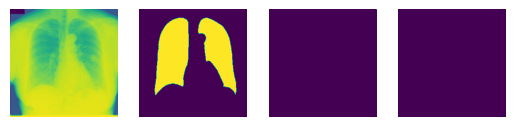

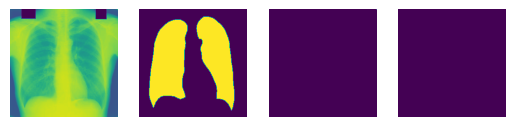

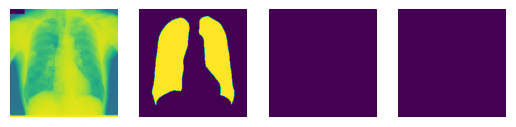

In [ ]:
Ztest = segnet(Xtest)
for i in range(len(Ztest)):
    plt.subplot(1, 4, 1)
    plt.imshow(Xtest[i][:,:,0])
    plt.axis('off')
    plt.subplot(1, 4, 2)
    plt.imshow(Ytest[i][:,:,0])
    plt.axis('off')
    plt. subplot (1, 4, 3)
    plt.imshow(Ztest[i][:,:,0])
    plt.axis('off')
    plt. subplot (1, 4, 4)
    plt.imshow(Ztest[i][:,:,0] > 0.5) # 0.5 คือ treshold ที่บอกว่าเป็นปอด จะได้ true flase ที่เป็น binary
    plt.axis('off')
    # plt.imshow(Ztest [i].numpy () .argmax(axis=2))
    plt.show()

# UNeT

# Residual Neural Network (ResNet)

# CIFAR-10

dataset รูปภาพขนาดเล็ก 32*32*3

In [ ]:
from tensorflow import keras
(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.cifar10.load_data()

In [ ]:
Xtrain.shape

(50000, 32, 32, 3)

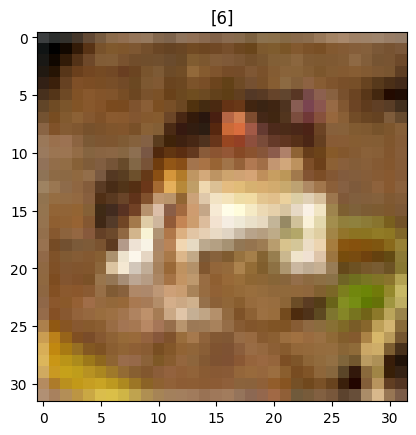

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Xtrain[0])
plt.title(Ytrain[0])
plt.show()


# Generative Adversarial Networks (GANs)

- Generate new data from given a real training set
- two models are trained sinultaneously by an adversarial process
>- A ***generator*** learns to generate new data from random input
>- A ***discriminator*** learns how to tell if it is real or fake

Data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

X = np.concatenate((Xtrain, Xtest))
X = X.astype(np.float32)[:,:,:,None] / 255.
del Xtrain, Xtest

BATCH_SIZE = 256
X = tf.data.Dataset.from_tensor_slices(X).shuffle(len(X)).batch(BATCH_SIZE)

Generator

In [ ]:
generator = tf.keras.Sequential ()
generator.add(layers.Dense (7*7*256, use_bias=False, input_shape= (100,)))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())
generator.add(layers.Reshape ((7, 7, 256)))
generator.add(layers.Conv2DTranspose(128, (5, 5), strides= (1, 1),
                                     padding= 'same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())
generator.add(layers.Conv2DTranspose(64, (5, 5), strides= (2, 2),
                                     padding='same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU () )
generator.add(layers.Conv2DTranspose(1, (5, 5), strides= (2, 2),
                                     padding='same', use_bias=False,
                                     activation='sigmoid'))

generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)       

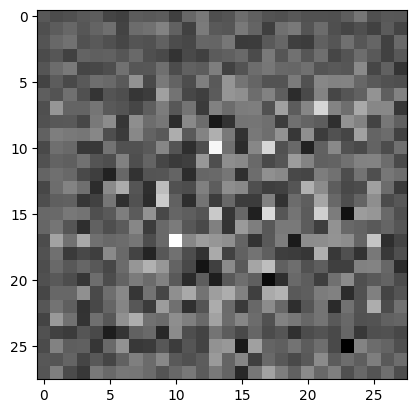

In [ ]:
import matplotlib.pyplot as plt

# ใช้ generator โยที่ยังไม่ได้ train
noise = tf.random.normal([1, 100])
generated_image =  generator(noise, training=False)
plt.imshow(generated_image[0,:,:,0], cmap = 'gray')

Discriminator

ต้องแยกให้ออกว่า input ที่เข้ามา ture/false

In [ ]:
discriminator = tf.keras.Sequential()
discriminator.add(layers.Conv2D(64, (5, 5), strides= (2, 2),
                                 padding='same', input_shape = (28, 28, 1)))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))
discriminator.add(layers.Conv2D(128, (5, 5), strides = (2, 2),
                                padding='same') )
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1))
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

Loss

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
# loss generator
def generator_loss(fake_output) :
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# discriminator_loss

def discriminator_loss(real_output, fake_output) :
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

Training step function

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
@tf.function
def train_step(images) : # ใส่ real input
    noise = tf.random.normal([BATCH_SIZE, noise_dim]) # random noise ตาม input ของ generator

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True) # fake ได้ภาพปลอมออกมา

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # หา loss
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) # diff เทียบกับตัวแปรทุกตัวที่จะปรับ weigth
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) # เอาผลลัพธ์จากการ diff มาใส่ optimizer เพื่อ update weigth
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


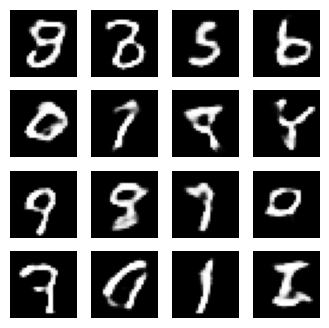

epoch = 50


In [ ]:
from IPython import display

epochs = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

for epoch in range(epochs) :
    for image_batch in X:
        train_step(image_batch)
    predictions = generator(seed, training=False)

    display.clear_output(wait=True)
    fig = plt.figure(figsize = (4, 4))
    for i in range(predictions.shape[0]) :
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.savefig(str(epoch) + ' png')
    plt.show()
    print('epoch =', epoch+1)

In [ ]:
import imageio
anim_file = "result.gif"

with imageio.get_writer(anim_file, mode = "I") as writer :
    for i in range(epochs) :
        file_name = str(i) + " png.png"
        image = imageio.imread(file_name)
        writer.append_data(image)
    writer.append_data(image)

<ipython-input-22-dce496c9fffe>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(file_name)


# Super Resolution GAN (SRGAN)
- input is low resolution and output is high resolution image

# Time-Series

- Use normal neural network
>- Windowing input

- Use recurrent neural networks
>- RNN, LSTM, GRU

## Normal neural network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# windowing

def makedata(x, window = 3) :
    X = []
    Y = []
    for i in range(len(x) - window):
        X.append(x[i:i+window])
        Y.append(x[i+window])
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

Generate data

In [ ]:
train = np.array([1,2,3,4,5,6,7], np.float)
test = np.array([8,9,10,11], np.float)
Xtrain, Ytrain = makedata(train)
Xtest, Ytest = makedata(test)

<ipython-input-22-5912bcf56f00>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train = np.array([1,2,3,4,5,6,7], np.float)
<ipython-input-22-5912bcf56f00>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test = np.array([8,9,10,11], np.float)


Multi-layer Perceptron (MLP)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(1))

model.compile(loss = "mse",
              optimizer = keras.optimizers.SGD(learning_rate = 1e-5))


In [ ]:
model.fit(Xtrain, Ytrain, epochs = 1000)

In [ ]:
Z = model.predict(Xtest)
Ytest, Z

1/1 [==============================] - 0s 31ms/step


(array([11.]), array([[11.349147]], dtype=float32))

### stock Prediction

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

ap = yf.Ticker('ap.bk')
ap_price_df = ap.history(interval='1d')
ap_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-18 00:00:00+07:00,11.670473,11.765354,11.575591,11.670473,23205000,0.00,0.0
2023-04-19 00:00:00+07:00,11.670473,11.765355,11.480710,11.575591,19520000,0.00,0.0
2023-04-20 00:00:00+07:00,11.575591,11.860236,11.575591,11.765354,16705300,0.00,0.0
2023-04-21 00:00:00+07:00,11.670473,11.860236,11.670473,11.765354,12760500,0.00,0.0
2023-04-24 00:00:00+07:00,11.670473,11.955119,11.575591,11.955119,16104200,0.00,0.0
2023-04-25 00:00:00+07:00,11.860237,11.955119,11.670473,11.670473,20300100,0.00,0.0
2023-04-26 00:00:00+07:00,11.670473,11.765354,11.575591,11.765354,10737800,0.00,0.0
2023-04-27 00:00:00+07:00,11.765354,11.955118,11.670473,11.860236,15298200,0.00,0.0
2023-04-28 00:00:00+07:00,11.860237,12.050000,11.765355,11.955119,28922300,0.00,0.0


In [ ]:
X ,Y = makedata(ap_price_df["Close"].values)

In [ ]:
model.fit(X, Y, epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.1484
Epoch 2/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.1067
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.0667
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.0282
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.9913
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.9558
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.9218
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.8891
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.8577
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.8275
Epoch 11/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.7986
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7708
Epoch 13/2000
1/1 [=========================

1/1 [==============================] - 0s 96ms/step


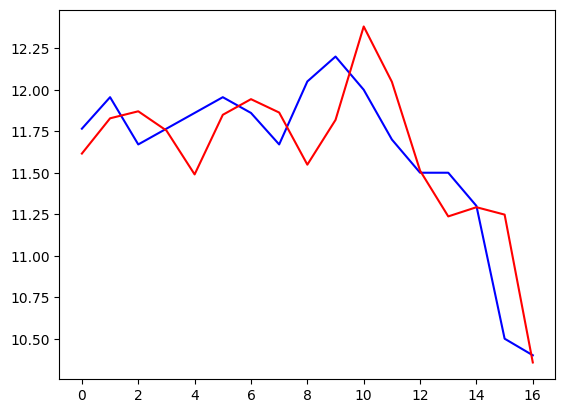

In [ ]:
Z = model.predict(X)

plt.plot(Y, "b")
plt.plot(Z, "r")
plt.show()

# Text
- Computer cannot understand text directly
>- Text must be represent in number
>>- Frequency of words
>>- Embedded vector




- For Thai sentence, we need word segmentation
>- Use attacut :

In [ ]:
! pip install attacut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 68.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=cf8347a6b47a103eea90db1a38f02eceb4c8e97b360a4e6cb225855a2ed6cd26
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=8f8ca31db8e9e30950acd9a39eb1564b5b5b1e26b4cfba12d76e88e584b49eba
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70

In [ ]:
from attacut import tokenize

tokenize("ฉันหิวข้าว")

['ฉัน', 'หิว', 'ข้าว']

### TFIDF with naive bayes classifier

In [ ]:
Xtrain = [
    "'บิ๊กตู่' ให้กำลังใจ จนท.บำราศนราดูร ขอหนักนิดเบาหน่อยพูดกันดีๆ พร้อมปรับแก้",
    "รัฐบาลไฟเขียวต่อายุราชการ อธิบดีกรมอุทยานแห่งชาติฯ อีก 1 ปี",
    "'บิ๊กป้อม' รับปากเคลียร์ 'สิระ-ไผ่' ปะทะเดือดไลน์ พปชร. ยันทำงานกับ ปชป.ได้",
    "จ่อเซ็นแมนฯยู!! 'จู๊ด เบลลิงแฮม' วันเดอร์คิดเบอร์มิงแฮมพร้อมครอบครัวบุกสนามซ้อมแคร์ริงตัน",
    "'จิ้งจอก' เลิกบู่ 'วาร์ดิ-บาร์นส' คนละ 2 เม็ดถลุงวิลล่ายับ 4-0",
    "'ลิเวอร์พูด' นับถอยหลัง 5 วัน ฉลองแชมป์ที่บ้าน 'เอฟเวอร์ตัน'"
]

Ytrain = [
    "การเมือง",
    "การเมือง",
    "การเมือง",
    "กีฬา",
    "กีฬา",
    "กีฬา"
]

Xtest = [
    "'อิทธิพล' ยัน คน พปชร.พี่น้องกัน เคลียร์กันได้ หลังไลน์เดือดปมหน้ากาก",
    "'บิ๊กป้อม' รับปากเคลียร์ 'สิระ-ไผ่' ปะทะเดือดไลน์ พปชร. ยันทำงานกับ ปชป.ได้",
    "'ลิเวอร์พูด' นับถอยหลัง 5 วัน ฉลองแชมป์ที่บ้าน 'เอฟเวอร์ตัน'",
    "เงินเหลือๆ 'ฟลอยด์' ปล่อยวาทะเด็ดพร้อมฮุบกิจการ 'นิวคาสเซิล'"
]

## text feature extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(tokenizer=tokenize)
Xtrain_count = count_vect.fit_transform(Xtrain)
tf_transformer = TfidfTransformer(use_idf=False)
tf_transformer.fit(Xtrain_count)
Xtrain_tf = tf_transformer.transform(Xtrain_count)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(Xtrain_tf, Ytrain)

MultinomialNB()

In [ ]:
Xtest_count = count_vect.transform(Xtest)
Xtest_tf = tf_transformer.transform(Xtest_count)
clf.predict(Xtest_tf)

array(['การเมือง', 'การเมือง', 'กีฬา', 'กีฬา'], dtype='<U8')